In [2]:
#!pip install fiftyone
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("kitti", split="test")

Split 'test' already downloaded
Loading existing dataset 'kitti-test'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [3]:
dataset

Name:        kitti-test
Media type:  image
Num samples: 7518
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [ ]:
# split data into train, tune, test

In [4]:
session = fo.launch_app()

In [16]:

# Initialize a defaultdict to store the label counts
label_counts = defaultdict(int)

# Iterate through each sample in the dataset
for sample in dataset:
    # Extract the labels for each sample
    detections = sample.ground_truth.detections

    # Iterate through each detection
    for detection in detections:
        label = detection.label

        # Increment the count for each label
        label_counts[label] += 1

# Print the label counts
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: Pedestrian, Count: 4487
Label: Truck, Count: 1094
Label: Car, Count: 28742
Label: Cyclist, Count: 1627
Label: DontCare, Count: 11295
Label: Misc, Count: 973
Label: Van, Count: 2914
Label: Tram, Count: 511
Label: Person_sitting, Count: 222


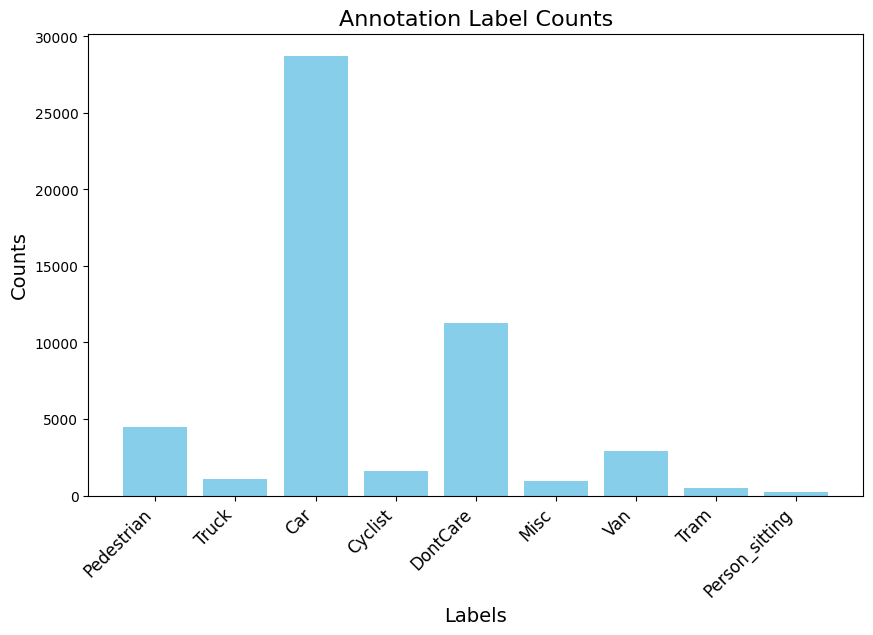

In [17]:
import matplotlib.pyplot as plt

# Assuming you already have the label_counts dictionary from the previous code

# Extract the labels and counts
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Annotation Label Counts', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()


In [9]:
# Define the target labels
target_labels = ["Pedestrian", "Truck", "Car", "Cyclist", "Dontcare", "Misc", "Van", "Tram", "Person_sitting"]

# Initialize a dictionary to store the occurrences of the target labels in each image
label_occurrences_per_image = defaultdict(lambda: defaultdict(int))
image_count = len(dataset)

# Iterate through each sample in the dataset
for sample in dataset:
    # Extract the labels for each sample
    detections = sample.ground_truth.detections

    # Update the occurrences of the target labels in the current image
    for detection in detections:
        if detection.label in target_labels:
            label_occurrences_per_image[sample.id][detection.label] += 1

# Calculate the average occurrences per picture for each label
average_occurrences_per_label = defaultdict(float)
for label in target_labels:
    total_occurrences = sum(
        label_occurrences_per_image[img_id][label]
        for img_id in label_occurrences_per_image
    )
    average_occurrences_per_label[label] = round(total_occurrences / image_count, 3)

# Print the average occurrences per picture for each label
for label, average in average_occurrences_per_label.items():
    print(f"Label: {label}, Average Occurrences per Picture: {average}")


Label: Pedestrian, Average Occurrences per Picture: 0.6
Label: Truck, Average Occurrences per Picture: 0.146
Label: Car, Average Occurrences per Picture: 3.842
Label: Cyclist, Average Occurrences per Picture: 0.217
Label: Dontcare, Average Occurrences per Picture: 0.0
Label: Misc, Average Occurrences per Picture: 0.13
Label: Van, Average Occurrences per Picture: 0.39
Label: Tram, Average Occurrences per Picture: 0.068
Label: Person_sitting, Average Occurrences per Picture: 0.03


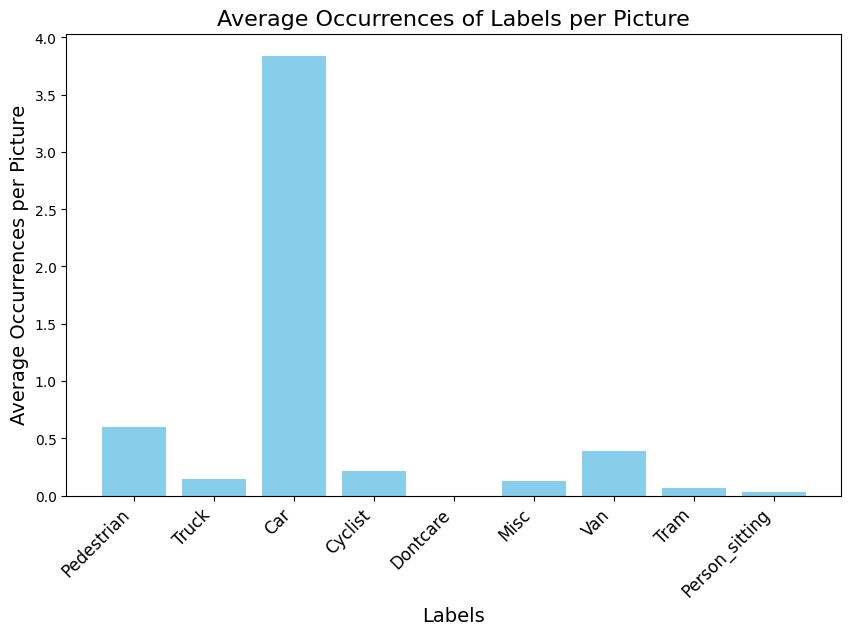

In [11]:
# Extract labels and average occurrences
labels = list(average_occurrences_per_label.keys())
averages = list(average_occurrences_per_label.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, averages, color='skyblue')
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Average Occurrences per Picture', fontsize=14)
plt.title('Average Occurrences of Labels per Picture', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()
